# Automação Web e Busca de Informações com Python

#### Desafio: 

Trabalhamos em uma importadora e o preço dos nossos produtos é vinculado a cotação de:
- Dólar
- Euro
- Ouro

Precisamos pegar na internet, de forma automática, a cotação desses 3 itens e saber quanto devemos cobrar pelos nossos produtos, considerando uma margem de contribuição que temos na nossa base de dados.

Base de Dados: https://drive.google.com/drive/folders/1KmAdo593nD8J9QBaZxPOG1yxHZua4Rtv?usp=sharing

Para isso, vamos criar uma automação web:

- Usaremos o selenium
- Importante: baixar o webdriver

In [11]:
!pip install -U selenium
#!pip freeze

Requirement already up-to-date: selenium in c:\users\gadne\anaconda3\lib\site-packages (4.1.3)


- Importando a base de dados

Atenção para a necessidade de baixar e instalar o webdriver para o navegador que se está desejnaod utilizar, aqui usaremos o Google Chrome e o webdriver para a sua versão correspondente (https://chromedriver.chromium.org/downloads).
Para verificar a sua versão do navegador, acessar o seguinte link: chrome://settings/help
Sua tela deverá mostrar o seguinte:
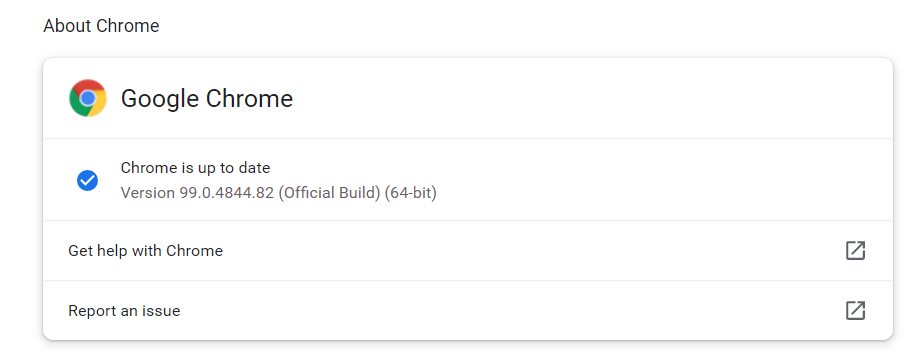


O driver deve ser copiado para a pasta onde o arquivo python.exe está instalado em sua máquina.

### Agora vamos atualiza a nossa base de preços com as novas cotações

- Importando a base de dados

In [12]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

- Reproduzir os seguintes passos em forma de códigos

1) Entrar no navegador

2) Encontrar site desejado

3) Pegar o valor encontrado como resultado da busca

In [13]:
#1- Entrando no google Chrome
navegador = webdriver.Chrome()

#2- Encontrar site desejado e realizar as buscas
navegador.get("https://www.google.com/")
navegador.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys("cotação dólar")
navegador.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys(Keys.ENTER)

#3- Coletando o resultado da busca
cotacao_dolar = navegador.find_element(By.XPATH, '/html/body/div[7]/div/div[10]/div/div[2]/div[2]/div/div/div[1]/div/div/div/div/div/div[3]/div[1]/div[1]/div[2]/span[1]').get_attribute("data-value")
print(cotacao_dolar)

4.742


In [14]:
#Realizando o mesmo mas para a cotação do Euro
navegador.get("https://www.google.com/")
navegador.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys("cotação euro")
navegador.find_element(By.XPATH, '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input').send_keys(Keys.ENTER)

cotacao_euro = navegador.find_element(By.XPATH, '/html/body/div[7]/div/div[10]/div/div[2]/div[2]/div/div/div[1]/div/div/div/div/div/div[3]/div[1]/div[1]/div[2]/span[1]').get_attribute("data-value")
print(cotacao_euro)

5.254444230000001


In [15]:
#Agora realizar a busca de cotação do Ouro
navegador.get("https://www.melhorcambio.com/ouro-hoje")
cotacao_ouro = navegador.find_element(By.XPATH, '/html/body/div[6]/div[1]/div/div/input[2]').get_attribute("value")
cotacao_ouro = cotacao_ouro.replace(",", ".")
print(cotacao_ouro)

296.02


In [16]:
#Fechando o navegador após o término das pesquisas e armazenamento das variáveis

- Atualizando os preços e o cálculo do Preço Final

In [17]:
#Importando as bases com a lista de produtos
import pandas as pd

tabela = pd.read_excel("Produtos.xlsx")
display(tabela)

,Produtos,Preço Original,Moeda,Cotação,Preço de Compra,Margem,Preço de Venda
0,Câmera Canon,999.99,Dólar,5,4999.95,1.40,6999.930
1,Carro Renault,4500.00,Euro,6,27000.00,2.00,54000.000
2,Notebook Dell,899.99,Dólar,5,4499.95,1.70,7649.915
3,IPhone,799.00,Dólar,5,3995.00,1.70,6791.500
4,Carro Fiat,3000.00,Euro,6,18000.00,1.90,34200.000
5,Celular Xiaomi,480.48,Dólar,5,2402.40,2.00,4804.800
6,Joia 20g,20.00,Ouro,350,7000.00,1.15,8050.000


In [18]:
#Atualizando os dados da tabela com as novas cotações
tabela.loc[tabela["Moeda"] == "Dólar", "Cotação"] = float(cotacao_dolar)
tabela.loc[tabela["Moeda"] == "Euro", "Cotação"] = float(cotacao_euro)
tabela.loc[tabela["Moeda"] == "Ouro", "Cotação"] = float(cotacao_ouro)
display(tabela)

,Produtos,Preço Original,Moeda,Cotação,Preço de Compra,Margem,Preço de Venda
0,Câmera Canon,999.99,Dólar,4.742000,4999.95,1.40,6999.930
1,Carro Renault,4500.00,Euro,5.254444,27000.00,2.00,54000.000
2,Notebook Dell,899.99,Dólar,4.742000,4499.95,1.70,7649.915
3,IPhone,799.00,Dólar,4.742000,3995.00,1.70,6791.500
4,Carro Fiat,3000.00,Euro,5.254444,18000.00,1.90,34200.000
5,Celular Xiaomi,480.48,Dólar,4.742000,2402.40,2.00,4804.800
6,Joia 20g,20.00,Ouro,296.020000,7000.00,1.15,8050.000


In [19]:
#Corrigindo o cálculo contido nas colunas que são afetadas pelas novas cotações
tabela["Preço de Compra"] = tabela["Preço Original"] * tabela["Cotação"]
tabela["Preço de Venda"] = tabela["Preço de Compra"] * tabela["Margem"]
display(tabela)

,Produtos,Preço Original,Moeda,Cotação,Preço de Compra,Margem,Preço de Venda
0,Câmera Canon,999.99,Dólar,4.742000,4741.952580,1.40,6638.733612
1,Carro Renault,4500.00,Euro,5.254444,23644.999035,2.00,47289.998070
2,Notebook Dell,899.99,Dólar,4.742000,4267.752580,1.70,7255.179386
3,IPhone,799.00,Dólar,4.742000,3788.858000,1.70,6441.058600
4,Carro Fiat,3000.00,Euro,5.254444,15763.332690,1.90,29950.332111
5,Celular Xiaomi,480.48,Dólar,4.742000,2278.436160,2.00,4556.872320
6,Joia 20g,20.00,Ouro,296.020000,5920.400000,1.15,6808.460000


### Agora vamos exportar a nova base de preços atualizada

In [20]:
#Retornar como resultado uma tabela nova excel com valores atualizados

tabela.to_excel("Produtos_Novos.xlsx", index=False)